In [1]:
import pandas as pd
import numpy as np

# Load Profiles

In [2]:
df = pd.read_excel('fes-data-workbook-v30.xlsx', sheet_name='4.25 - 4.27', header=5, usecols='N:Q')
df.head()

,Hour,Residential,Work,Public
0,00:00:00,0.110411,0.004016,0.002754
1,01:00:00,0.075705,0.003294,0.002305
2,02:00:00,0.048047,0.002703,0.001810
3,03:00:00,0.031226,0.002554,0.001397
4,04:00:00,0.022187,0.002667,0.001388


In [3]:
df = df.drop(columns=['Hour'])
df = df.rename(columns={
    'Residential':'domestic',
    'Work':'work',
    'Public':'public'
})
df.head()

,domestic,work,public
0,0.110411,0.004016,0.002754
1,0.075705,0.003294,0.002305
2,0.048047,0.002703,0.001810
3,0.031226,0.002554,0.001397
4,0.022187,0.002667,0.001388


In [4]:
len(df) == 7 * 24

True

In [5]:
columns = df.columns
columns

Index(['domestic', 'work', 'public'], dtype='object')

In [6]:
one_week = df
one_week_np = one_week.to_numpy().T
one_week_np.shape

(3, 168)

In [7]:
one_year_np = np.tile(one_week_np, 52).T
one_year_np.shape

(8736, 3)

In [8]:
df = pd.DataFrame(one_year_np)
df.columns = columns
df.shape

(8736, 3)

In [9]:
df.head()

,domestic,work,public
0,0.110411,0.004016,0.002754
1,0.075705,0.003294,0.002305
2,0.048047,0.002703,0.001810
3,0.031226,0.002554,0.001397
4,0.022187,0.002667,0.001388


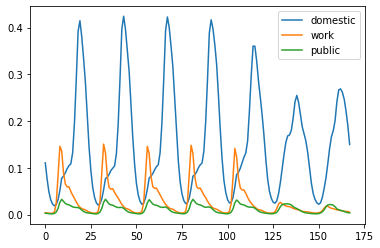

In [10]:
df[:24*7].plot()

In [11]:
df.to_csv('../cleaned/charging_behaviour_study_profiles.csv')

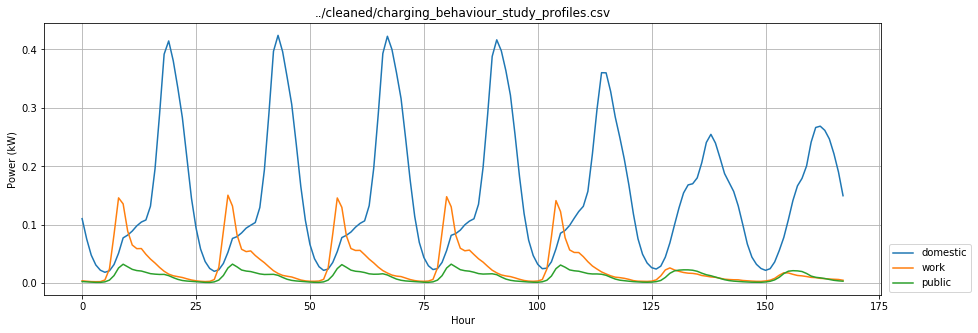

In [12]:
ax = ( df[:7*24].plot(title='../cleaned/charging_behaviour_study_profiles.csv',
                   grid=True,
                   figsize=(15,5)) )
ax.legend(loc=(1.01, 0.01))
discard = ax.set_xlabel('Hour')
discard = ax.set_ylabel('Power (kW)')

# Annual Trends

## Residential

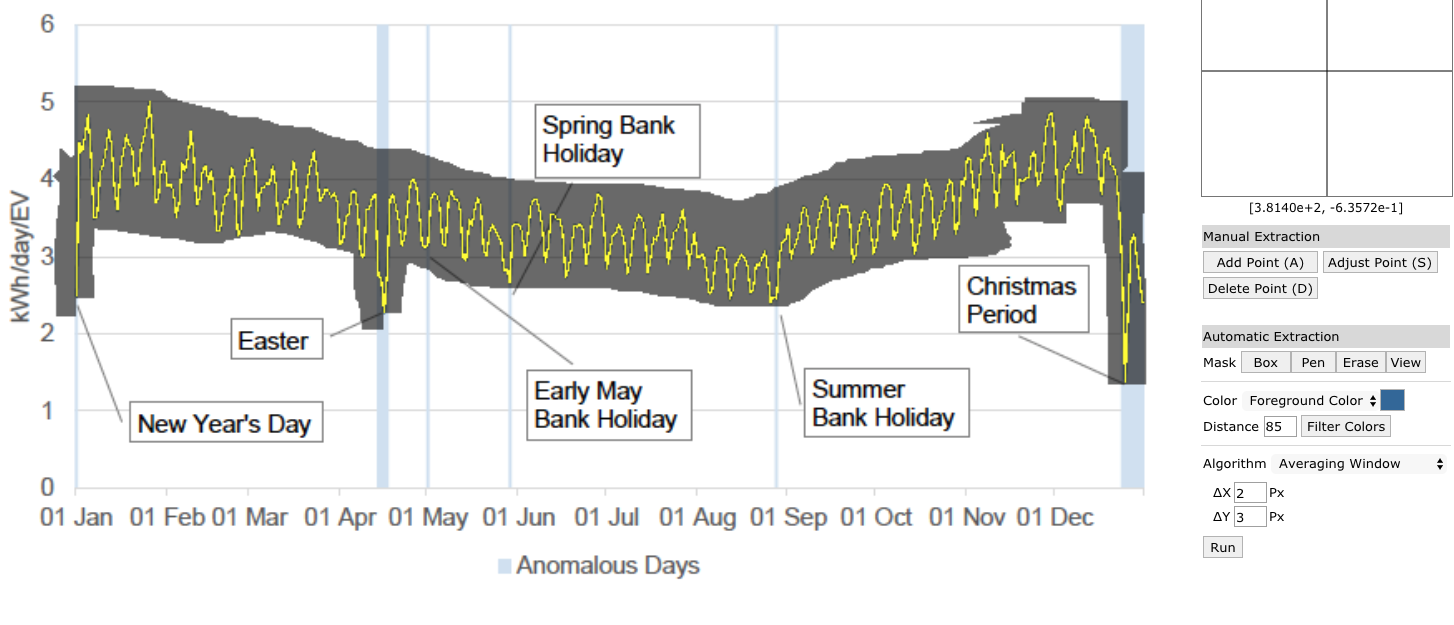

In [13]:
df = pd.read_csv('residential_trend.csv', header=None, names=['day', 'kWh'], index_col='day')
df.head()

,kWh
day,
0.983,2.51
0.993,2.62
1.000,2.71
1.010,2.79
1.020,2.88


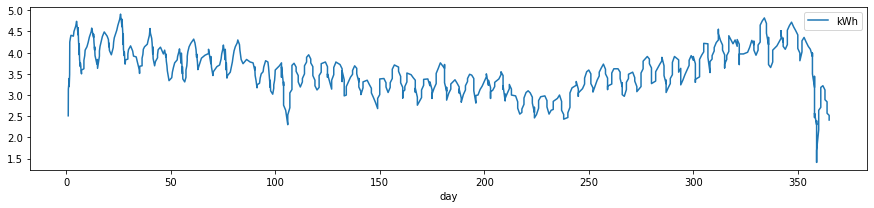

In [14]:
df.plot(figsize=(15,3))

In [15]:
df = df[ ~df.index.duplicated() ]
df =  ( df.reindex(
        df.index.unique().union( range(0,364) ) )
        .interpolate()
        .reindex( range(0,364) , )
      )
df.head()

,kWh
0,NaN
1,2.710
2,4.340
3,4.400
4,4.565


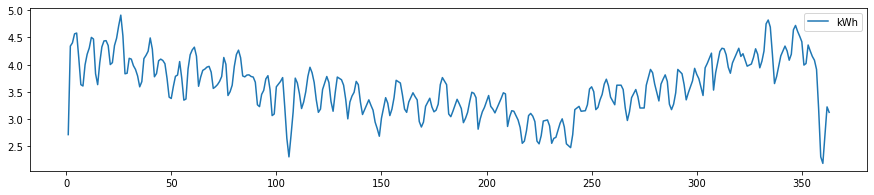

In [16]:
df.plot(figsize=(15,3))

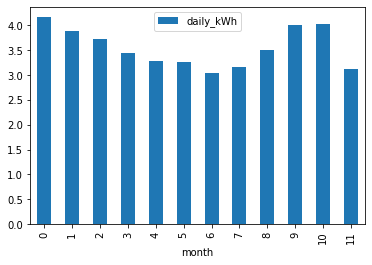

In [17]:
df = df.groupby( df.index // ( len(df) // (12-1) ) ).mean()
df = df.rename(columns={'kWh':'daily_kWh'})
df.index.name = 'month'
ax = df.plot.bar()

In [18]:
residential = df.copy()

# Work

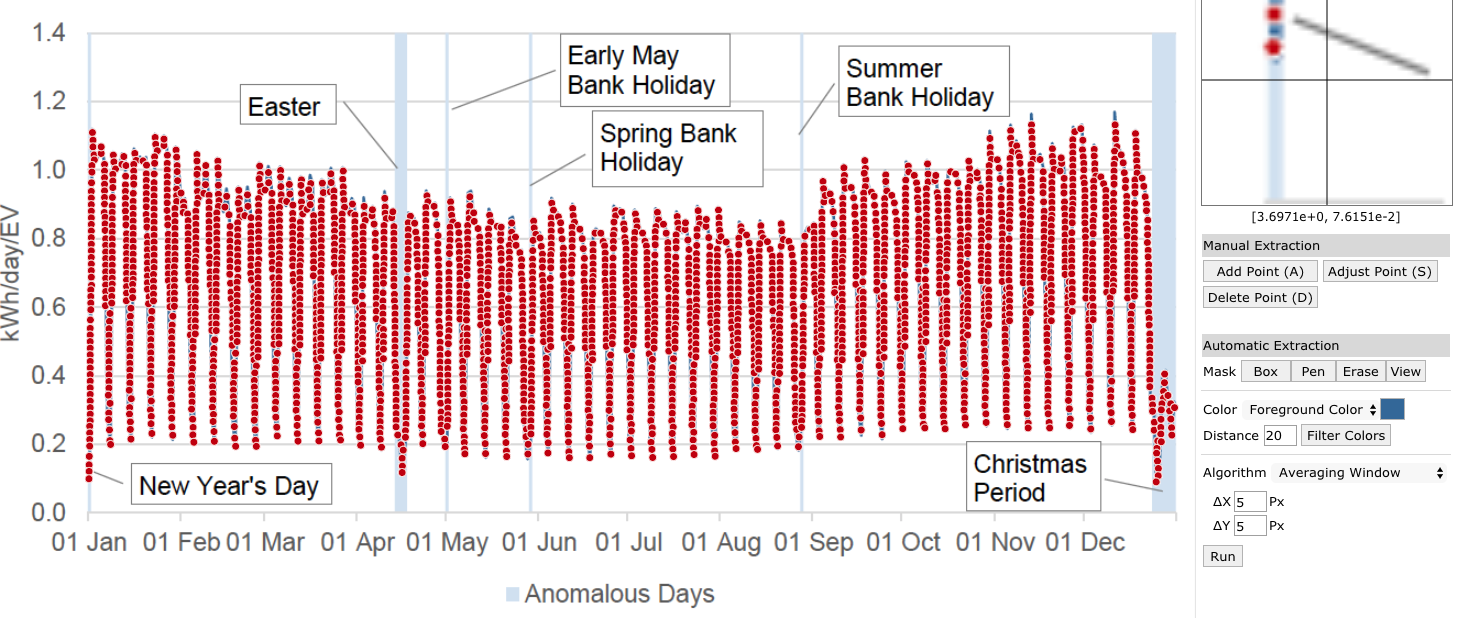

In [19]:
df = pd.read_csv('work_trend.csv', header=None, names=['day', 'kWh'], index_col='day')
df.head()

,kWh
day,
0.494,0.1630
0.397,0.1380
0.369,0.1190
0.276,0.0974
1.440,0.5620


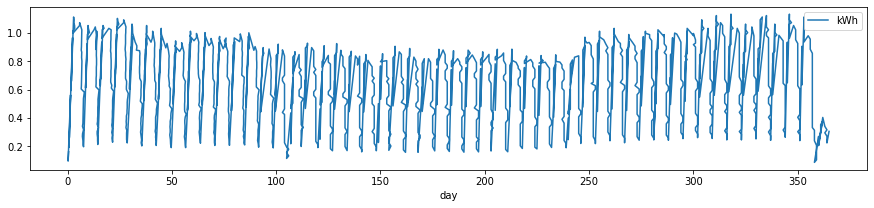

In [20]:
df.plot(figsize=(15,3))

In [21]:
df = df[ ~df.index.duplicated() ]
df =  ( df.reindex(
        df.index.unique().union( range(0,364) ) )
        .interpolate()
        .reindex( range(0,364) , )
      )
df.head()

,kWh
0,NaN
1,0.296000
2,0.736000
3,1.090000
4,1.036667


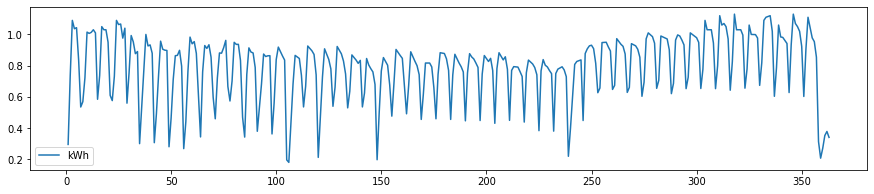

In [22]:
df.plot(figsize=(15,3))

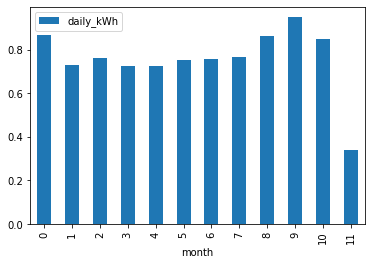

In [23]:
df = df.groupby( df.index // ( len(df) // (12-1) ) ).mean()
df = df.rename(columns={'kWh':'daily_kWh'})
df.index.name = 'month'
ax = df.plot.bar()

In [24]:
work = df.copy()

# Public

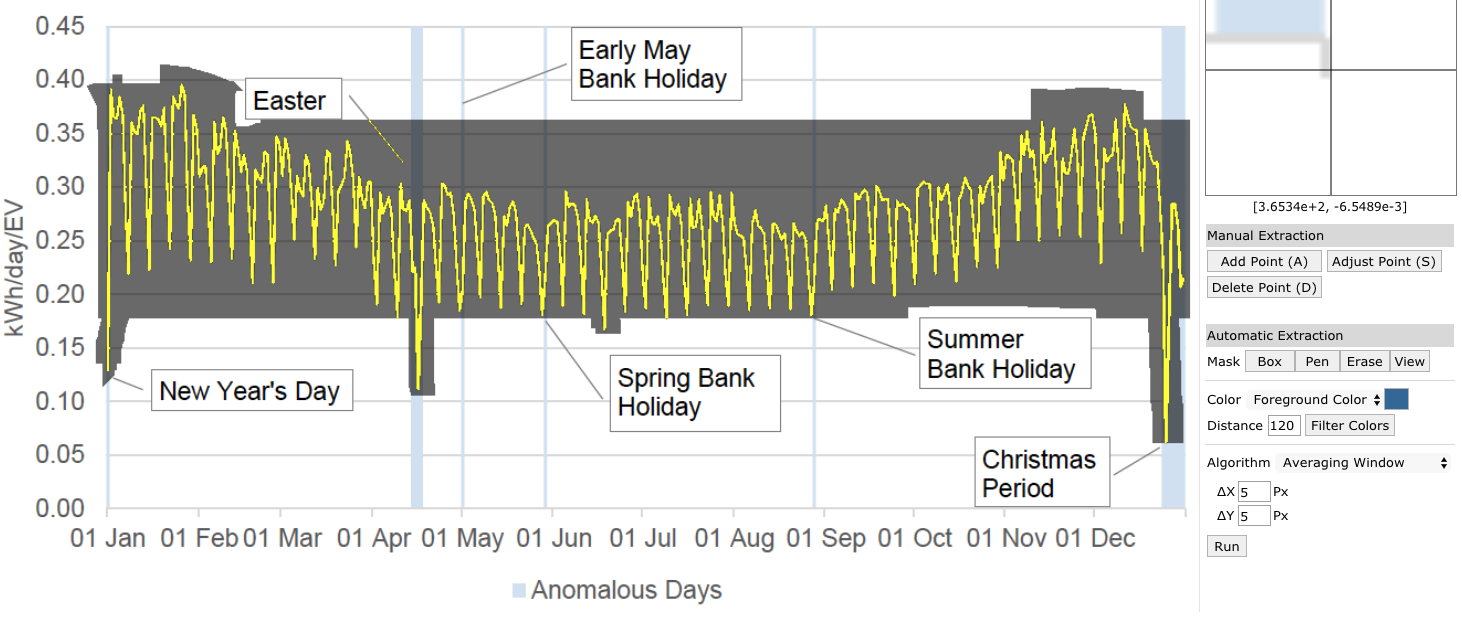

In [25]:
df = pd.read_csv('public_trend.csv', header=None, names=['day', 'kWh'], index_col='day')
df.head()

,kWh
day,
7.110000e-15,0.160
7.110000e-15,0.166
7.110000e-15,0.154
7.110000e-15,0.141
7.110000e-15,0.135


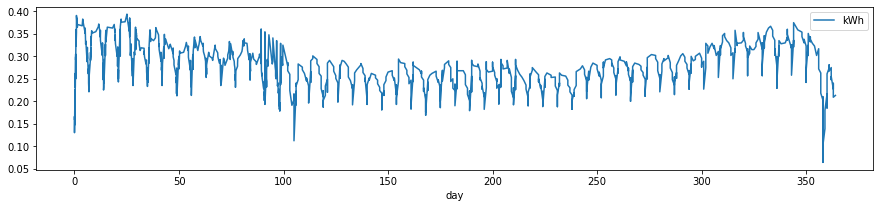

In [26]:
df.plot(figsize=(15,3))

In [27]:
df = df[ ~df.index.duplicated() ]
df =  ( df.reindex(
        df.index.unique().union( range(0,364) ) )
        .interpolate()
        .reindex( range(0,364) , )
      )
df.head()

,kWh
0,NaN
1,0.3655
2,0.3700
3,0.3690
4,0.3795


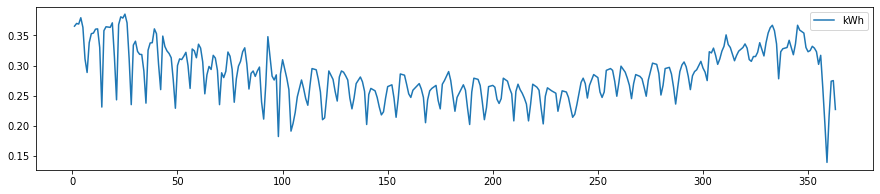

In [28]:
df.plot(figsize=(15,3))

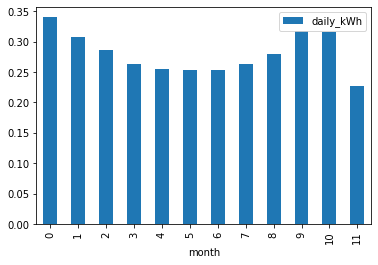

In [29]:
df = df.groupby( df.index // ( len(df) // (12-1) ) ).mean()
df = df.rename(columns={'kWh':'daily_kWh'})
df.index.name = 'month'
ax = df.plot.bar()

In [30]:
public = df.copy()

## Merge

In [31]:
all_df = pd.DataFrame( [residential.daily_kWh, work.daily_kWh, public.daily_kWh] ).T
all_df.columns = ['residential_daily_kwh', 'work_daily_kwh', 'public_daily_kwh']
all_df

,residential_daily_kwh,work_daily_kwh,public_daily_kwh
month,,,
0,4.167187,0.866875,0.340615
1,3.893131,0.730667,0.307828
2,3.732323,0.760439,0.285909
3,3.435000,0.726167,0.263515
4,3.289697,0.726955,0.254303
5,3.250909,0.750970,0.253636
6,3.035455,0.756515,0.252652
7,3.150303,0.765985,0.263652
8,3.502879,0.864091,0.279712


In [32]:
all_df.to_csv('../cleaned/charging_behaviour_study_trends.csv')

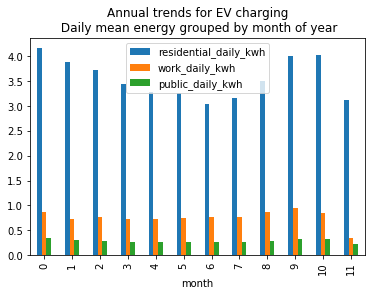

In [36]:
pd.read_csv('../cleaned/charging_behaviour_study_trends.csv', index_col='month').plot.bar(
    title='Annual trends for EV charging\n Daily mean energy grouped by month of year')